In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df_copy = df.copy()

In [7]:
df_copy["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
df_copy["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
df_copy["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [10]:
df_copy.replace({"Fuel_Type":{"Petrol":0, "Diesel":1, "CNG":2}}, inplace=True)
df_copy.replace({"Seller_Type":{"Dealer":0, "Individual":1}}, inplace=True)
df_copy.replace({"Transmission":{"Manual":0, "Automatic":1}}, inplace=True)

In [11]:
df_copy

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [13]:
X = df_copy.drop(["Car_Name", "Selling_Price"], axis=1)
y = df_copy["Selling_Price"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Linear Regression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

#### R2_score on train Data 

In [21]:
train_data_prediction = model.predict(X_train)

error_score = metrics.r2_score(y_train, train_data_prediction)
print("Root Squared Error is: ",error_score*100,"%")

Root Squared Error is:  88.38169193709791 %


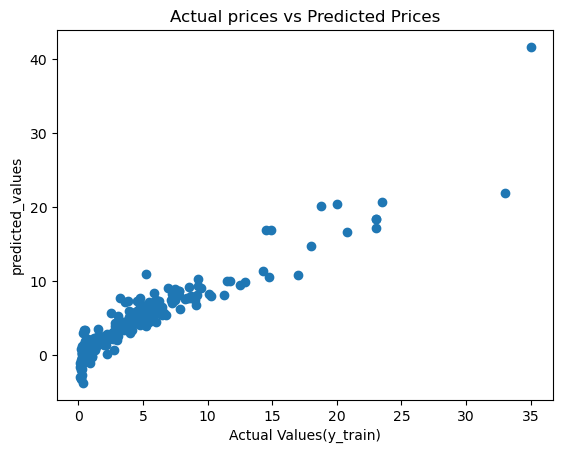

In [23]:
plt.scatter(y_train, train_data_prediction)
plt.xlabel("Actual Values(y_train)")
plt.ylabel("predicted_values")
plt.title("Actual prices vs Predicted Prices")
plt.show()

#### R2_score on test Data

In [22]:
test_data_prediction = model.predict(X_test)

error_score = metrics.r2_score(y_test, test_data_prediction)
print("Root Squared Error is: ",error_score*100,"%")

Root Squared Error is:  84.01532365377781 %


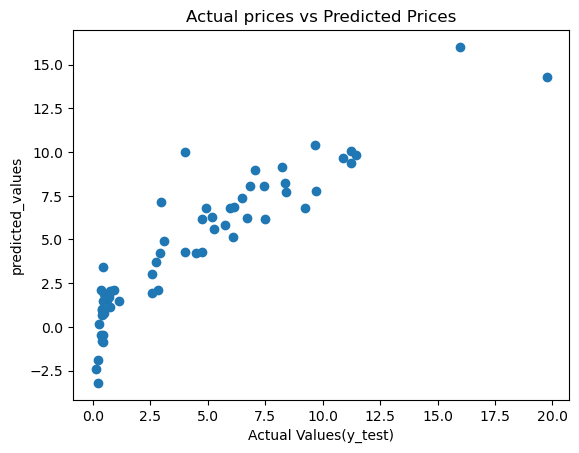

In [24]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Values(y_test)")
plt.ylabel("predicted_values")
plt.title("Actual prices vs Predicted Prices")
plt.show()

## Let us Now Perform Lasso Regression and Compare Accuracy to Linear Model

### Lasso Regression

In [25]:
lasso_model = Lasso()

In [26]:
lasso_model.fit(X_train, y_train)

Lasso()

#### R2_score on train Data using Lasso Regression

In [28]:
train_data_prediction = lasso_model.predict(X_train)

error_score = metrics.r2_score(y_train, train_data_prediction)
print("Root Squared Error is: ",error_score*100,"%")

Root Squared Error is:  84.35873952582827 %


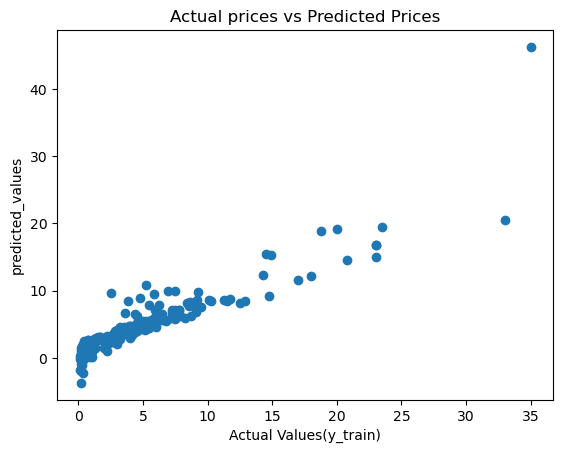

In [29]:
plt.scatter(y_train, train_data_prediction)
plt.xlabel("Actual Values(y_train)")
plt.ylabel("predicted_values")
plt.title("Actual prices vs Predicted Prices")
plt.show()

#### R2_score on test Data using Lasso Regression

In [30]:
test_data_prediction = lasso_model.predict(X_test)

error_score = metrics.r2_score(y_test, test_data_prediction)
print("Root Squared Error is: ",error_score*100,"%")

Root Squared Error is:  84.9745757073854 %


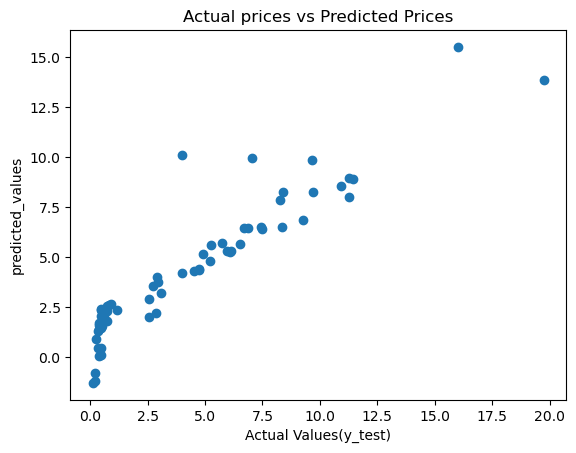

In [31]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Values(y_test)")
plt.ylabel("predicted_values")
plt.title("Actual prices vs Predicted Prices")
plt.show()